<a href="https://colab.research.google.com/github/shanikairoshi/QML-and-Deep-Unfolded_QML/blob/main/D_VQC_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit-machine-learning
!pip install qiskit qiskit_machine_learning qiskit_algorithms
!pip install qiskit-aer
from IPython.display import clear_output
clear_output()

<ipython-input-10-dc958845b676>:51: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Training the VQC on iris data...
Training Accuracy: 57.50%
Test Accuracy: 50.00%


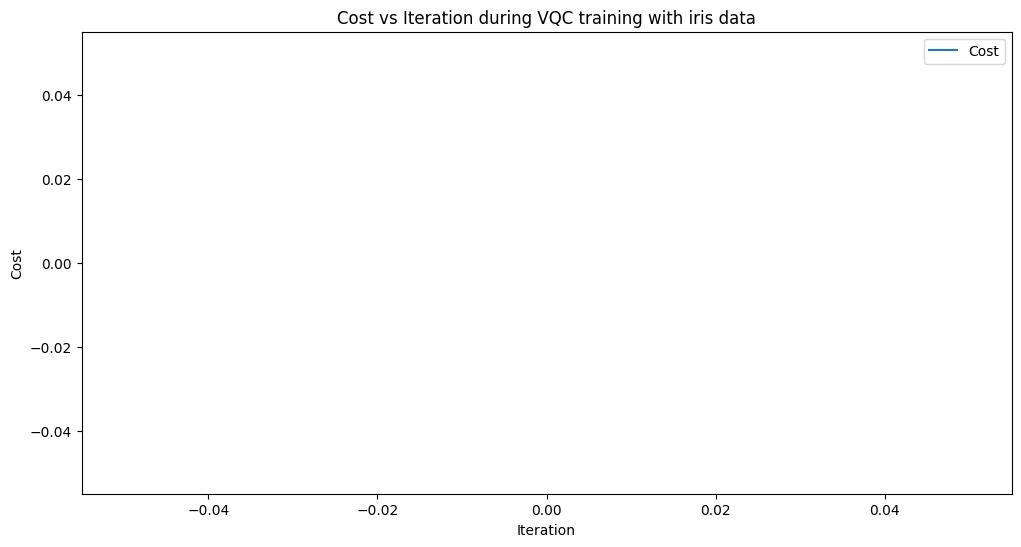

Learning rate data not available for the selected optimizer.


In [10]:
from qiskit_machine_learning.datasets import ad_hoc_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import csv
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.utils.loss_functions import Loss
from qiskit_algorithms.optimizers import SPSA, COBYLA, GradientDescent
from qiskit_algorithms.utils import algorithm_globals # Import algorithm_globals
from sklearn.datasets import load_iris
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

# Set random seed for reproducibility using algorithm_globals
algorithm_globals.random_seed = 42  # Set seed globally

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X = X[y != 2]  # Binary classification
y = y[y != 2]

# Split into train and test
data_train, data_test, data_train_labels, data_test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

# Step 2: Define feature map and ansatz

# Define quantum feature map and ansatz
feature_dim = data_train.shape[1]
prep = ZZFeatureMap(feature_dim, reps=2)
ansatz = RealAmplitudes(num_qubits=feature_dim, reps=4)

#FEATURE_MAP = ZZFeatureMap(feature_dimension=2, reps=2)
#ANSATZ = TwoLocal(2, ['ry', 'rz'], 'cz', reps=2)

# Step 3: Define optimizer (SPSA for example)
OPTIMIZER = SPSA(maxiter=60, learning_rate=0.1, perturbation=0.1)

# Step 4: Initialize VQC
sampler = Sampler()
vqc = VQC(
    sampler=sampler,
    feature_map=prep,
    ansatz=ansatz,
    optimizer=OPTIMIZER,
    loss="cross_entropy",  # Using cross-entropy loss
)

# Step 5: Train the VQC model
print("Training the VQC on iris data...")
vqc.fit(data_train, data_train_labels)

# Step 6: Test the model
test_predictions = vqc.predict(data_test)
train_predictions = vqc.predict(data_train)

# Step 7: Evaluate the accuracy
test_accuracy = accuracy_score(data_test_labels, test_predictions)
train_accuracy = accuracy_score(data_train_labels, train_predictions)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Optional: Plot the results (training cost over iterations)
# Initialize CSV file to log training data (costs)
csv_file = "iris_vqc_training_log.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Cost", "LearningRate"])

objective_func_vals = []
learning_rates = []

def callback_graph(weights, obj_func_eval):
    # Clear the previous plot
    clear_output(wait=True)

    objective_func_vals.append(obj_func_eval)

    if isinstance(OPTIMIZER, SPSA):
        learning_rates.append(OPTIMIZER.learning_rate)
    else:
        learning_rates.append(None)

    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([len(objective_func_vals), obj_func_eval, learning_rates[-1]])

    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# Plot the cost over iterations if the training was logged
data = pd.read_csv(csv_file)

plt.figure(figsize=(12, 6))
plt.plot(data["Iteration"], data["Cost"], label="Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration during VQC training with iris data")
plt.legend()
plt.show()

# Plot the learning rate if available
if not data["LearningRate"].isnull().all():
    plt.figure(figsize=(12, 6))
    plt.plot(data["Iteration"], data["LearningRate"], label="Learning Rate", color='orange')
    plt.xlabel("Iteration")
    plt.ylabel("Learning Rate")
    plt.title("Learning Rate vs Iteration during VQC training with iris data")
    plt.legend()
    plt.show()
else:
    print("Learning rate data not available for the selected optimizer.")


The follwing code implementation is refer the default qiskit vqc model and it shows environment setting as follows:
1.

# **The following implementation shows how deep unfolding implement in vqc qiskit algorithm**



Let's try to evaluate different featuremaps, datasets, and optimizers in following code for default qiskit.

<ipython-input-13-4ae48668e3d1>:97: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


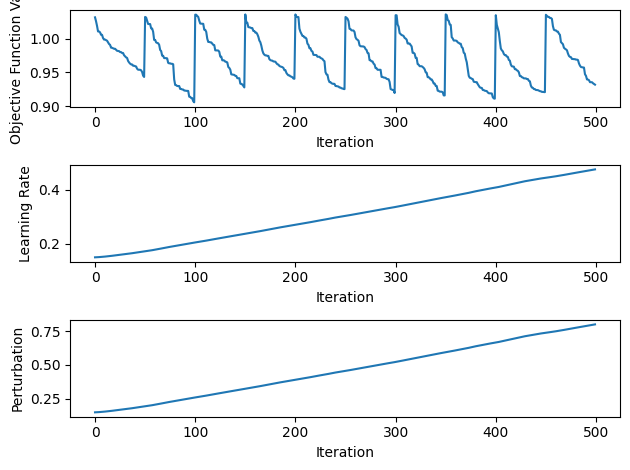

Iteration 10 - Training Accuracy: 63.75%
Iteration 10 - Test Accuracy: 40.00%
Final Training Accuracy: 63.75%
Final Test Accuracy: 40.00%
Total Training Time: 862.52 seconds


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms.classifiers import VQC

from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import SPSA
import time
from IPython.display import clear_output
import csv

from qiskit_algorithms.utils import algorithm_globals

# Set random seed for reproducibility
algorithm_globals.random_seed = 42

from sklearn.datasets import load_iris
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

# Set random seed for reproducibility using algorithm_globals
algorithm_globals.random_seed = 42  # Set seed globally

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X = X[y != 2]  # Binary classification
y = y[y != 2]

# Split into train and test
data_train, data_test, data_train_labels, data_test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

# Step 2: Define feature map and ansatz

# Define quantum feature map and ansatz
feature_dim = data_train.shape[1]
prep = ZZFeatureMap(feature_dim, reps=2)
ansatz = RealAmplitudes(num_qubits=feature_dim, reps=4)

# Variables to track objective function, learning rate, and perturbation
objective_func_vals = []
learning_rates = []
perturbations = []
initial_learning_rate = 0.15  # Starting learning rate
initial_perturbation = 0.15  # Starting perturbation value
momentum = 0.95  # Momentum factor for gradient smoothing
gradient_moving_avg_lr = 0
gradient_moving_avg_pert = 0



# Callback for visualization and adjustment, matching the number of arguments expected
def deep_unfolding_learning_rate_adjustment(nfev, parameters, obj_func_eval, stepsize=None, accept=None):
    global gradient_moving_avg_lr, gradient_moving_avg_pert, learning_rates, perturbations

    clear_output(wait=True)

    # Save the objective function value for visualization
    objective_func_vals.append(obj_func_eval)

    # Apply momentum and update learning rate if gradient is available
    if stepsize is not None:
        gradient_moving_avg_lr = momentum * gradient_moving_avg_lr + (1 - momentum) * stepsize
        delta_lr = 0.01 * gradient_moving_avg_lr
    else:
        delta_lr = 0

    # Apply momentum and update perturbation if gradient is available
    if stepsize is not None:
        gradient_moving_avg_pert = momentum * gradient_moving_avg_pert + (1 - momentum) * stepsize
        delta_perturbation = 0.02 * gradient_moving_avg_pert
    else:
        delta_perturbation = 0

    # Cap learning rate and perturbation updates to avoid runaway values
    max_lr = 1.0  # Maximum allowed learning rate
    max_perturbation = 1.0  # Maximum allowed perturbation

    # Update learning rate and perturbation with caps
    if len(learning_rates) > 0:
        new_lr = max(0.001, min(max_lr, learning_rates[-1] + delta_lr))
        new_perturbation = max(0.001, min(max_perturbation, perturbations[-1] + delta_perturbation))
    else:
        new_lr = initial_learning_rate
        new_perturbation = initial_perturbation

    learning_rates.append(new_lr)
    perturbations.append(new_perturbation)

    # Visualization of learning rate, perturbation, and objective function
    plt.title("Objective Function, Learning Rate, and Perturbation")

    plt.subplot(3, 1, 1)
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function Value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)

    plt.subplot(3, 1, 2)
    plt.xlabel("Iteration")
    plt.ylabel("Learning Rate")
    plt.plot(range(len(learning_rates)), learning_rates)

    plt.subplot(3, 1, 3)
    plt.xlabel("Iteration")
    plt.ylabel("Perturbation")
    plt.plot(range(len(perturbations)), perturbations)

    plt.tight_layout()
    plt.show()

# Custom SPSA optimizer with learnable learning rate and perturbation
class LearnableLRPerturbationSPSA(SPSA):
    def __init__(self, initial_lr=0.01, initial_perturbation=0.1, lr_alpha=0.01, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.lr = initial_lr
        self.perturbation = initial_perturbation
        self.lr_alpha = lr_alpha

    def _compute_lr_gradient(self, fun, point, grad):
        epsilon_lr = 1e-4  # Small value for finite difference approximation
        lr_plus = self.lr + epsilon_lr
        lr_minus = self.lr - epsilon_lr

        point_plus = point - lr_plus * grad
        point_minus = point - lr_minus * grad

        grad_lr = (fun(point_plus) - fun(point_minus)) / (2 * epsilon_lr)
        return grad_lr

    def _compute_perturbation_gradient(self, fun, point, grad):
        epsilon_pert = 1e-4
        pert_plus = self.perturbation + epsilon_pert
        pert_minus = self.perturbation - epsilon_pert

        point_plus = point - pert_plus * grad
        point_minus = point - pert_minus * grad

        grad_pert = (fun(point_plus) - fun(point_minus)) / (2 * epsilon_pert)
        return grad_pert

    def _update_learning_rate_and_perturbation(self, parameters, obj_func_eval, iteration):
        lr_gradient = self._compute_lr_gradient(self.objective_function, parameters, obj_func_eval)
        pert_gradient = self._compute_perturbation_gradient(self.objective_function, parameters, obj_func_eval)

        # Cap the gradient updates to avoid large changes
        max_grad = 10
        lr_gradient = np.clip(lr_gradient, -max_grad, max_grad)
        pert_gradient = np.clip(pert_gradient, -max_grad, max_grad)

        # Apply meta-learning rate updates
        self.lr += self.lr_alpha * lr_gradient
        self.perturbation += self.lr_alpha * pert_gradient

        # Apply decay and cap to ensure values remain within reasonable range
        decay = 0.99
        self.lr = max(0.001, min(1.0, self.lr * decay))
        self.perturbation = max(0.001, min(1.0, self.perturbation * decay))

    def step(self, gradient, obj_func_eval):
        self._update_learning_rate_and_perturbation(gradient, obj_func_eval)
        return super().step(gradient)

# Create optimizer with learnable learning rate and perturbation
spsa_optimizer = LearnableLRPerturbationSPSA(
    maxiter=50, learning_rate=initial_learning_rate, perturbation=initial_perturbation, callback=deep_unfolding_learning_rate_adjustment, lr_alpha=0.01
)

# Initialize VQC model with the deep unfolding optimizer
sampler = Sampler()
vqc = VQC(
    feature_map=prep,
    ansatz=ansatz,
    optimizer=spsa_optimizer,
    sampler=sampler,
)
'''
# Step 4: Initialize VQC
sampler = Sampler()
vqc = VQC(
    sampler=sampler,
    feature_map=prep,
    ansatz=ansatz,
    optimizer=OPTIMIZER,
    loss="cross_entropy",  # Using cross-entropy loss
)
'''

# Prepare to save results in a CSV file
csv_file = "dvqc_training_results.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Objective Function Value", "Training Accuracy", "Test Accuracy", "Learning Rate", "Perturbation"])

train_accuracies = []
test_accuracies = []

# Deep Unfolding with multiple iterations
total_time = 0

for i in range(10):
    print(f"Deep Unfolding Iteration {i+1}/10")

    start_time = time.time()
    vqc.fit(data_train, data_train_labels)
    end_time = time.time()
    total_time += end_time - start_time

    final_learning_rate = learning_rates[-1]
    final_perturbation = perturbations[-1]

    train_accuracy = vqc.score(data_train, data_train_labels)
    test_accuracy = vqc.score(data_test, data_test_labels)

    print(f"Iteration {i+1} - Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Iteration {i+1} - Test Accuracy: {test_accuracy * 100:.2f}%")

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([i+1, objective_func_vals[-1], train_accuracy * 100, test_accuracy * 100, final_learning_rate, final_perturbation])

print(f"Final Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Total Training Time: {total_time:.2f} seconds")
